In [2]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2015-12-04 11:42:32	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2015-12-04 11:42:32	Parsing datapackage to create a Study object
2015-12-04 11:43:18	Initializing Study
2015-12-04 11:43:18	Initializing Predictor configuration manager for Study
2015-12-04 11:43:18	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-12-04 11:43:18	Added ExtraTreesClassifier to default predictors
2015-12-04 11:43:18	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-12-04 11:43:18	Added ExtraTreesRegressor to default predictors
2015-12-04 11:43:18	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-12-04 11:43:18	Added GradientBoostingClassifier to default predictors
2015-12-04 11:43:18	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gra

In [3]:
transitions = study.phenotype_transitions + [('iPSC', 'MN')]
transitions

[(u'iPSC', u'NPC'), (u'NPC', u'MN'), ('iPSC', 'MN')]

In [4]:
transition_strs = ['{}-{}'.format(*transition) for transition in transitions]
transition_strs

['iPSC-NPC', 'NPC-MN', 'iPSC-MN']

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


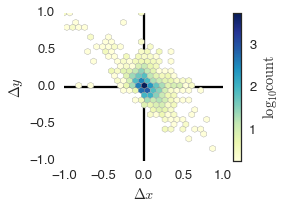

In [5]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(4, 3))
x = study.supplemental.voyages['$\Delta x$']
y = study.supplemental.voyages['$\Delta y$']

# ind = (x != 0) & (y != 0)
# x = x[ind]
# y = y[ind]

xmin = x.min()
xmax = x.max()

ymin = y.min()
ymax = y.max()

vmin = min(xmin, ymin)
vmax = max(xmax, ymax)

image = ax.hexbin(x, y, mincnt=1, bins='log', 
                  gridsize=25,
                  cmap='YlGnBu', edgecolor='darkgrey')
ax.hlines(0, vmin, vmax, zorder=-1)
ax.vlines(0, vmin, vmax, zorder=-1)
ax.set(xlabel='$\Delta x$', ylabel='$\Delta y$')
sns.despine(left=True, bottom=True)
plt.colorbar(image, label='$\log_{10} \mathrm{count}$', ticks=mpl.ticker.MaxNLocator(4))
fig.tight_layout()
fig.savefig('{}/voyage_distances_deltas.pdf'.format(folder))

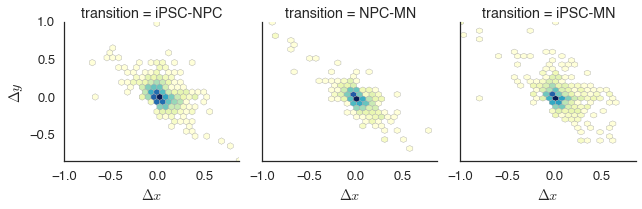

In [6]:
g = sns.FacetGrid(study.supplemental.voyages, col='transition', col_order=transition_strs)
g.map(plt.hexbin, '$\Delta x$', '$\Delta y$', mincnt=1, bins='log', 
      gridsize=25,
      cmap='YlGnBu', edgecolor='darkgrey')

In [7]:
study.supplemental.modalities_tidy.head()

,event_name,phenotype,modality,n_cells
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,iPSC,~1,29
1,exon:chr10:101480744-101480825:-@exon:chr10:10...,iPSC,~1,31
2,exon:chr10:101507014-101507147:+@exon:chr10:10...,iPSC,bimodal,39
3,exon:chr10:101997779-101997988:-@exon:chr10:10...,iPSC,~1,30
4,exon:chr10:102003455-102003529:-@exon:chr10:10...,iPSC,~1,27


In [8]:
voyages_modalities = study.supplemental.voyages.merge(study.supplemental.modalities_tidy, 
                                 left_on=['event_id', 'group1'], right_on=['event_name', 'phenotype'])

In [9]:
voyages_modalities.head()

,event_id,$\Delta x$,$\Delta y$,voyage_distance,group1,group2,direction,transition,event_name,phenotype,modality,n_cells
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.053571,-0.054198,0.076206,iPSC,NPC,$\searrow$,iPSC-NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,iPSC,~1,57
1,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,iPSC,~1,57
2,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,NPC,$\swarrow$,iPSC-NPC,exon:chr10:102286732-102286831:-@exon:chr10:10...,iPSC,~1,58
3,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,$\swarrow$,iPSC-MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,iPSC,~1,58
4,exon:chr10:102747070-102747190:-@exon:chr10:10...,0.004480,-0.004480,0.006336,iPSC,NPC,$\searrow$,iPSC-NPC,exon:chr10:102747070-102747190:-@exon:chr10:10...,iPSC,~1,36


406.0
2.0
1592.0
17.0
2.0
292.0
969.0
17.0
243.0
2.0
959.0
9.0
3.0


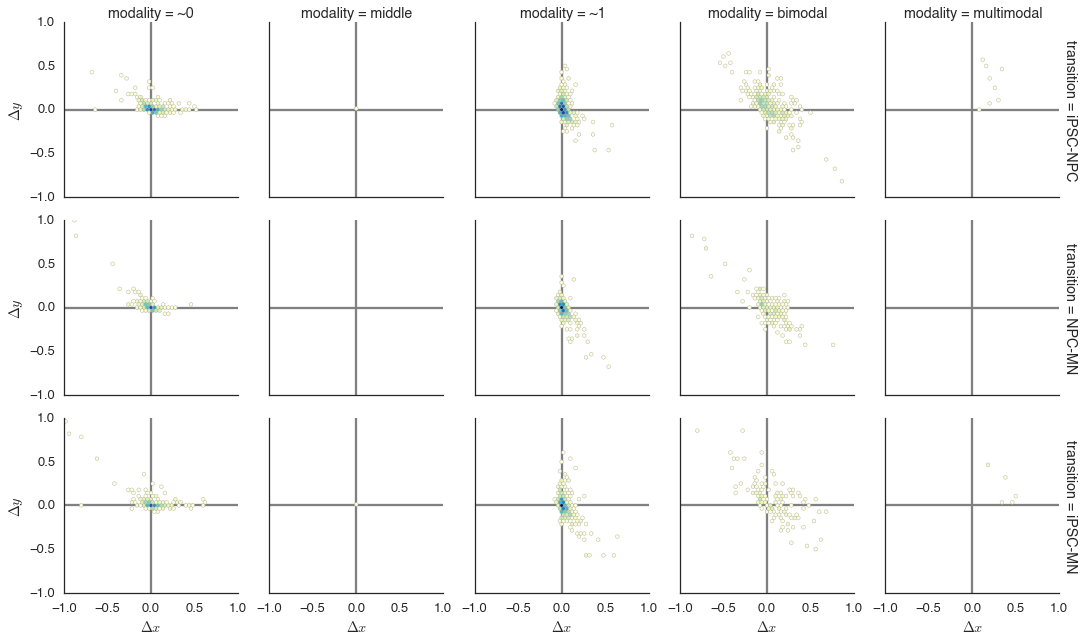

In [10]:
g = sns.FacetGrid(voyages_modalities, col='modality', row='transition', margin_titles=True,
                  row_order=transition_strs, col_order=MODALITY_ORDER)
g.map(plt.hexbin, '$\Delta x$', '$\Delta y$', mincnt=1, bins='log', 
      gridsize=50, extent=(-1, 1, -1, 1), vmax=3,
      cmap='YlGnBu', edgecolor='darkgrey')

# g.set_titles('{col_name} {row_name}')
for ax in g.axes.flat:
    ax.hlines(0, -1, 1, color='grey', zorder=-1)
    ax.vlines(0, -1, 1, color='grey', zorder=-1)
    collection = ax.collections[0]
    try:
        print 10**np.max(collection.get_array())
    except TypeError:
        continue

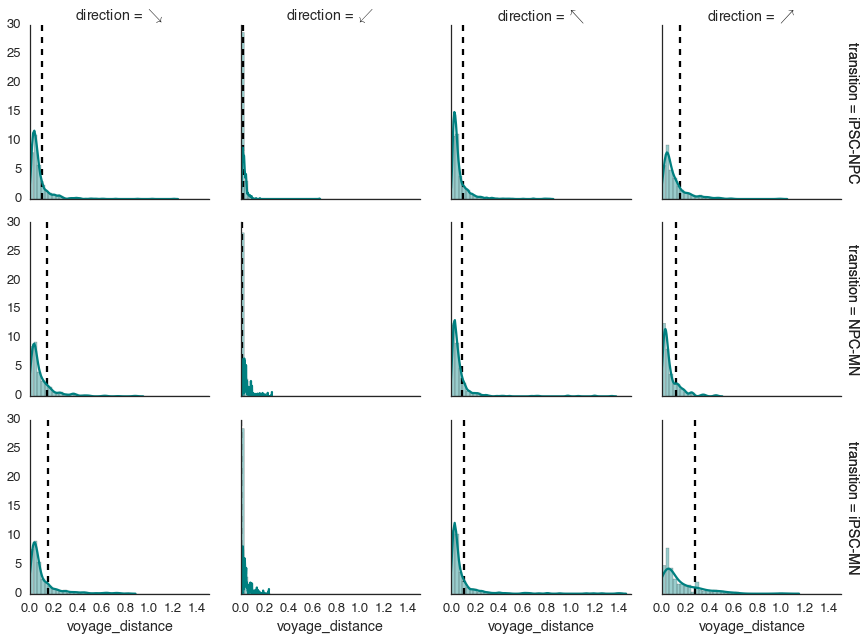

In [13]:
def plot_cutoff(x, cutoff_func, *args, **kwargs):
    ax = kwargs['ax'] if 'ax' in kwargs else plt.gca()
    ymin, ymax = ax.get_ylim()
    cutoff = cutoff_func(x)
    ax.vlines(cutoff, ymin, ymax, **kwargs)

g = sns.FacetGrid(study.supplemental.voyages, col='direction', row='transition', margin_titles=True, row_order=transition_strs)
g.map(sns.distplot, 'voyage_distance', color='teal', kde=True, bins=np.linspace(0, 1.5, 50))
g.map(plot_cutoff, 'voyage_distance', linestyle='--', color='k', cutoff_func=lambda x: x.quantile(0.8))
g.set(xlim=(0, 1.5))
g.savefig('{}/voyages_histogram_facetgrid.pdf'.format(folder))

## Features of changing events

In [14]:
delta_cols = ['$\Delta x$', '$\Delta y$']

voyages_filtered = study.supplemental.voyages.groupby(['transition', 'direction'], as_index=False, group_keys=False).apply(
    lambda x: x.loc[x.voyage_distance > x.voyage_distance.quantile(0.8)])

# voyages_filtered = study.supplemental.voyages.groupby(['transition', 'direction']).apply(
#     lambda x: x.loc[(x[delta_cols].abs() > (x[delta_cols].abs().mean() + 1*x[delta_cols].abs().std())).any(axis=1)])
print voyages_filtered.groupby('transition').size()

transition
NPC-MN      476
iPSC-MN     475
iPSC-NPC    917
dtype: int64


249.0
153.0
94.0


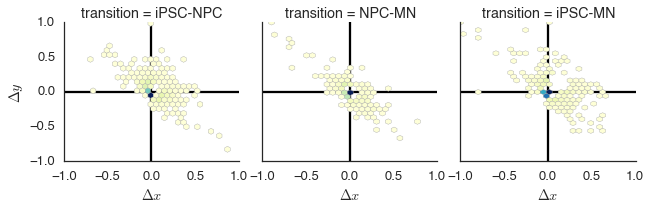

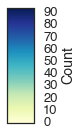

In [15]:
vmax = 35

g = sns.FacetGrid(voyages_filtered, col='transition', col_order=transition_strs)
g.map(plt.hexbin, '$\Delta x$', '$\Delta y$',# bins='log', 
      cmap='YlGnBu',
      mincnt=1, edgecolor='darkgrey', gridsize=25, #vmax=vmax, 
      vmin=0)
for ax in g.axes.flat:
    ax.hlines(0, -1, 1, color='k', zorder=-1)
    ax.vlines(0, -1, 1, color='k', zorder=-1)
    print np.max(ax.collections[0].get_array())
    
g.set(xlim=(-1, 1), ylim=(-1, 1))
g.savefig('{}/per_transition_voyages_facetgrid.pdf'.format(folder))

cfig, cax = plt.subplots(figsize=(1.25, 2))
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical',  label='Count')
cfig.tight_layout()
cfig.savefig('{}/per_transition_voyages_facetgrid_colorbar.pdf'.format(folder))
# sns.despine(bottom=True, left=True)

In [16]:
voyages_filtered.head()

,event_id,$\Delta x$,$\Delta y$,voyage_distance,group1,group2,direction,transition
4914,exon:chr12:53689366-53689423:+@exon:chr12:5368...,1.110223e-16,0.256930,0.256930,NPC,MN,$\nearrow$,NPC-MN
4922,exon:chr12:53856298-53856351:+@exon:chr12:5385...,1.070234e-01,0.103679,0.149008,NPC,MN,$\nearrow$,NPC-MN
4924,exon:chr12:53861005-53861077:+@exon:chr12:5386...,2.094907e-01,0.135417,0.249447,NPC,MN,$\nearrow$,NPC-MN
5051,exon:chr14:21737457-21737548:-@exon:chr14:2173...,1.025641e-01,0.085082,0.133260,NPC,MN,$\nearrow$,NPC-MN
5301,exon:chr16:81040339-81040444:-@exon:chr16:8103...,1.845238e-01,0.065476,0.195796,NPC,MN,$\nearrow$,NPC-MN


In [24]:
study.supplemental.voyages.groupby(['transition', 'direction']).size()

transition  direction 
NPC-MN      $\nearrow$     127
            $\nwarrow$     507
            $\searrow$     501
            $\swarrow$    1238
iPSC-MN     $\nearrow$     201
            $\nwarrow$     493
            $\searrow$     529
            $\swarrow$    1148
iPSC-NPC    $\nearrow$     463
            $\nwarrow$    1143
            $\searrow$    1121
            $\swarrow$    1855
dtype: int64

In [22]:
voyages_filtered.groupby(['transition', 'direction']).size()

transition  direction 
NPC-MN      $\nearrow$     26
            $\nwarrow$    102
            $\searrow$    100
            $\swarrow$    248
iPSC-MN     $\nearrow$     40
            $\nwarrow$     99
            $\searrow$    106
            $\swarrow$    230
iPSC-NPC    $\nearrow$     93
            $\nwarrow$    229
            $\searrow$    224
            $\swarrow$    371
dtype: int64

In [17]:
import pybedtools

bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges'
! mkdir $bed_folder

DIR = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

exon_bedfile = '{}/exon2.bed'.format(DIR)
exon_bed = pybedtools.BedTool(exon_bedfile)



## Features of changing events

In [18]:
study.splicing.feature_data.shape

(33693, 103)

In [28]:
voyages_annotated = voyages_filtered.join(study.splicing.feature_data, on='event_id')
voyages_annotated.head()

,event_id,$\Delta x$,$\Delta y$,voyage_distance,group1,group2,direction,transition,criteria,criteria_additional,...,isoform1_pfam_go_id,isoform1_pfam_go_name,isoform1_pfam_name,isoform2_pfam_accession,isoform2_pfam_go_id,isoform2_pfam_go_name,isoform2_pfam_name,isoform_domain_effects,custom_1,custom_2
4914,exon:chr12:53689366-53689423:+@exon:chr12:5368...,1.110223e-16,0.256930,0.256930,NPC,MN,$\nearrow$,NPC-MN,only one,NaN,...,nan[1],(nan)[1],Prefoldin[1],NaN,NaN,NaN,NaN,Protein +/- domain --> No annotated reading frame,True,True
4922,exon:chr12:53856298-53856351:+@exon:chr12:5385...,1.070234e-01,0.103679,0.149008,NPC,MN,$\nearrow$,NPC-MN,only one,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
4924,exon:chr12:53861005-53861077:+@exon:chr12:5386...,2.094907e-01,0.135417,0.249447,NPC,MN,$\nearrow$,NPC-MN,only one,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Same status,True,True
5051,exon:chr14:21737457-21737548:-@exon:chr14:2173...,1.025641e-01,0.085082,0.133260,NPC,MN,$\nearrow$,NPC-MN,random,no gencode transcripts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
5301,exon:chr16:81040339-81040444:-@exon:chr16:8103...,1.845238e-01,0.065476,0.195796,NPC,MN,$\nearrow$,NPC-MN,only one,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


In [29]:
voyages_annotated.shape

(1868, 111)

In [30]:
study.supplemental.voyages.shape

(9326, 8)

### Boolean features

In [34]:
transitions

[(u'iPSC', u'NPC'), (u'NPC', u'MN'), ('iPSC', 'MN')]

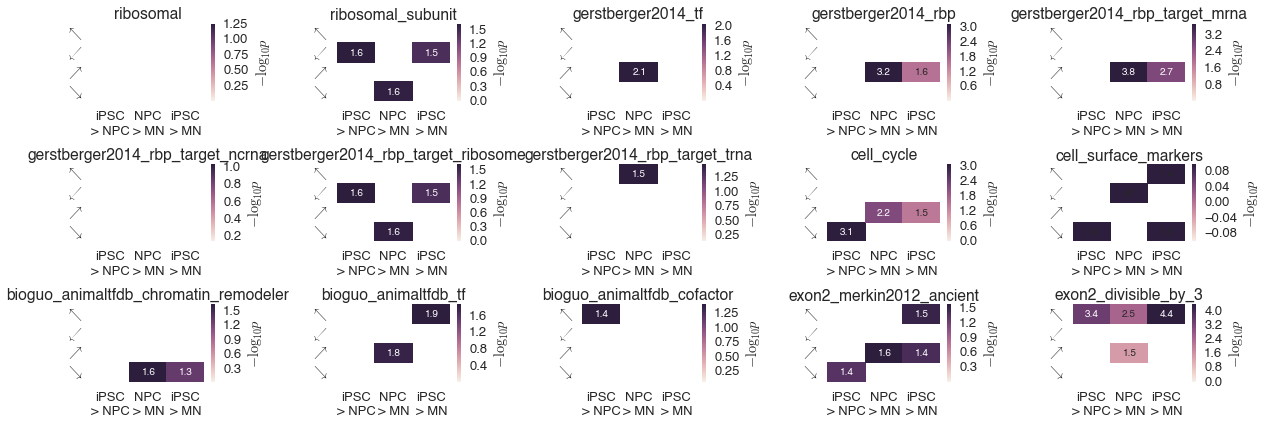

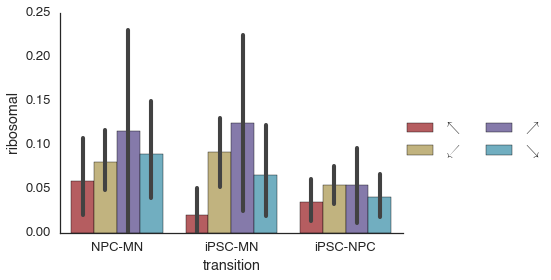

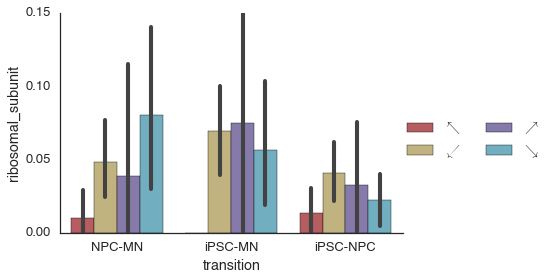

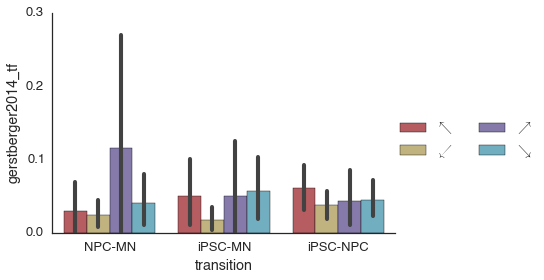

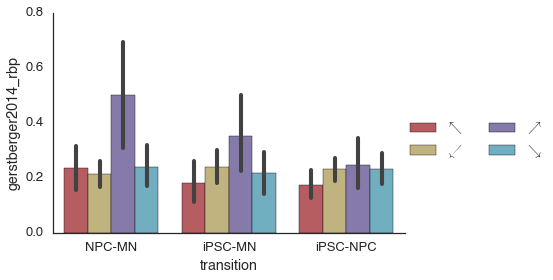

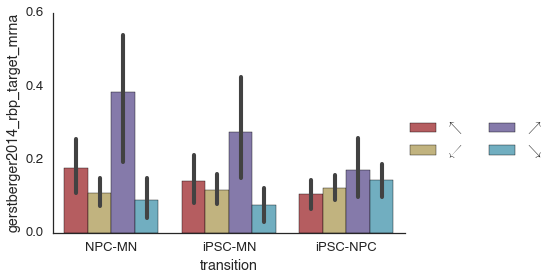

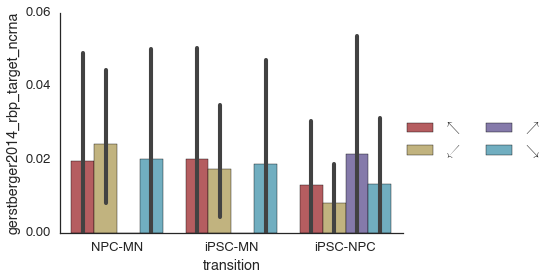

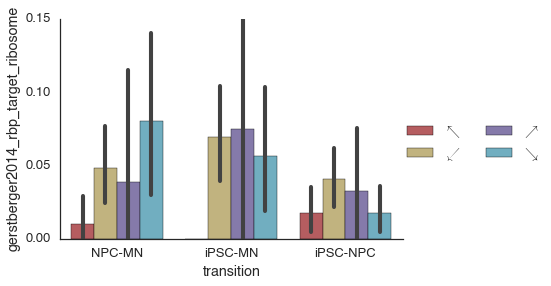

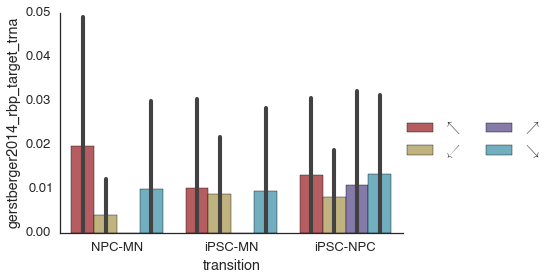

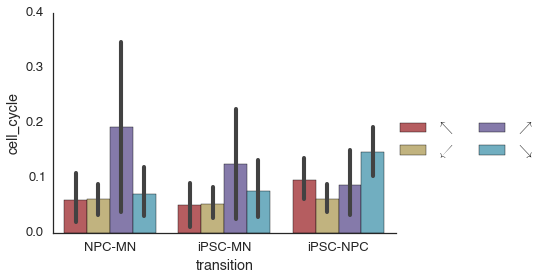

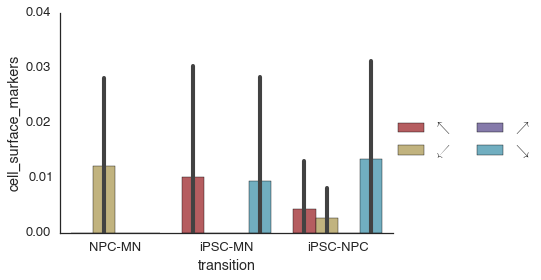

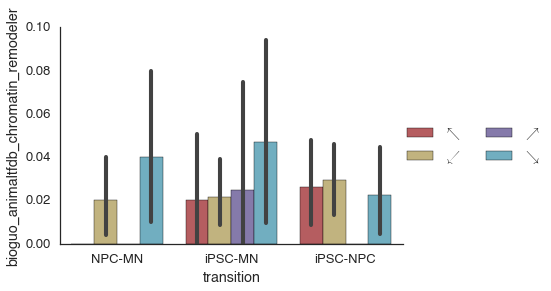

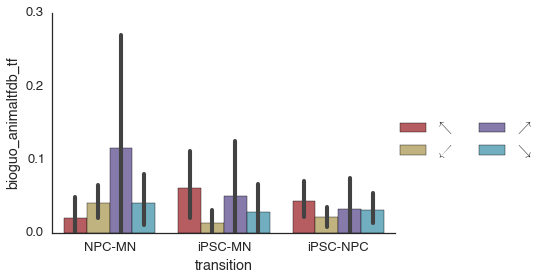

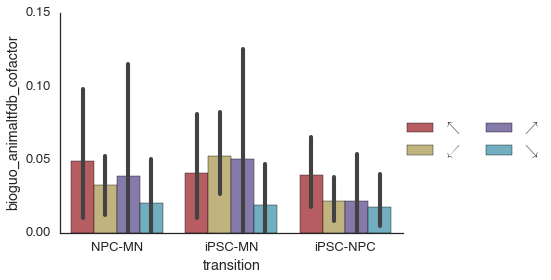

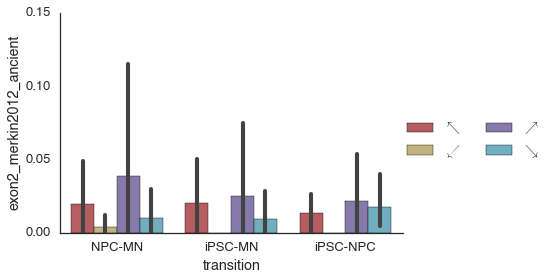

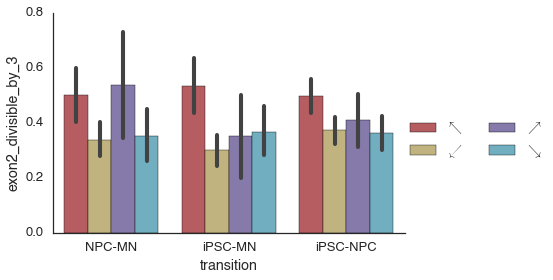

In [43]:
from scipy.stats import hypergeom

events = voyages_annotated.groupby('transition').apply(lambda x: x.event_id.unique())
n_events = events.apply(len)

events_in_modality = voyages_annotated.groupby(['transition', 'direction']).apply(
    lambda x: x.event_id.unique())
n_events_in_modality = events_in_modality.apply(len)


boolean_cols = ['ribosomal', 'ribosomal_subunit', 'gerstberger2014_tf',
        'gerstberger2014_rbp', 'gerstberger2014_rbp_target_mrna',  'gerstberger2014_rbp_target_ncrna',
        'gerstberger2014_rbp_target_ribosome', 'gerstberger2014_rbp_target_trna',
       'cell_cycle', 'cell_surface_markers', 'bioguo_animaltfdb_chromatin_remodeler', 'bioguo_animaltfdb_tf',
       'bioguo_animaltfdb_cofactor', 'exon2_merkin2012_ancient', 'exon2_divisible_by_3']

# hue_order = ['~0', 'bimodal', '~1']
# palette = [MODALITY_TO_COLOR[m] for m in hue_order]
hue_order = [ r'$\nwarrow$', r'$\swarrow$',  r'$\nearrow$', r'$\searrow$']
palette = [MODALITY_TO_COLOR['~1'], MODALITY_TO_COLOR['middle'], MODALITY_TO_COLOR['bimodal'], MODALITY_TO_COLOR['~0']]


ncols = 5
nrows = 1
while nrows * ncols < len(boolean_cols):
    nrows += 1
width = 3.5
height = 2
figsize = ncols * width, nrows * height

heatmap_fig, heatmap_axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes_iter = heatmap_axes.flat


for col in boolean_cols:
    g = sns.factorplot(y=col, x='transition', hue='direction', data=voyages_annotated, 
                       aspect=1.5, kind='bar', size=4, legend=False, hue_order=hue_order, palette=palette)
    for ax in g.axes.flat:
        ax.locator_params('y', nbins=5)
#     g.fig.tight_layout()
    g.add_legend(ncol=2, label_order=hue_order)
    g.savefig('{}/voyages_features_{}.pdf'.format(folder, col))
    
    
    p_values = pd.DataFrame(index=hue_order, columns=transition_strs)
    for modality in hue_order:
        for transition in transition_strs:
            M = n_events[transition]
            N = n_events_in_modality[transition, modality]
            n = study.splicing.feature_data.loc[events[transition], col].sum()
            x = study.splicing.feature_data.loc[events_in_modality[transition, modality], col].sum()

            p_values.loc[modality, transition] = hypergeom.sf(x, M, n, N)
    p_values = p_values.astype(float)
    
    heatmap_ax = axes_iter.next()
    plt.sca(heatmap_ax)
    sns.heatmap(-np.log10(p_values), annot=True, mask=p_values > 0.05, 
                cbar_kws=dict(label='$-\log_{10} p$'), ax=heatmap_ax)
    locations, labels = plt.yticks()
    plt.setp(labels, rotation=0)
    xticklabels = map(lambda x: '\n> '.join(x), transitions)
    
    heatmap_ax.set(title=col, xticklabels=xticklabels)
heatmap_fig.tight_layout()
heatmap_fig.savefig('{}/voyages_features_boolean_p_values.pdf'.format(folder))

In [62]:
[x for x in study.splicing.feature_data.columns if 'gc' in x]

['isoform1_gc',
 'isoform1_gc_position1',
 'isoform1_gc_position2',
 'isoform1_gc_position3',
 'isoform2_gc',
 'isoform2_gc_position1',
 'isoform2_gc_position2',
 'isoform2_gc_position3']

### Numerical features

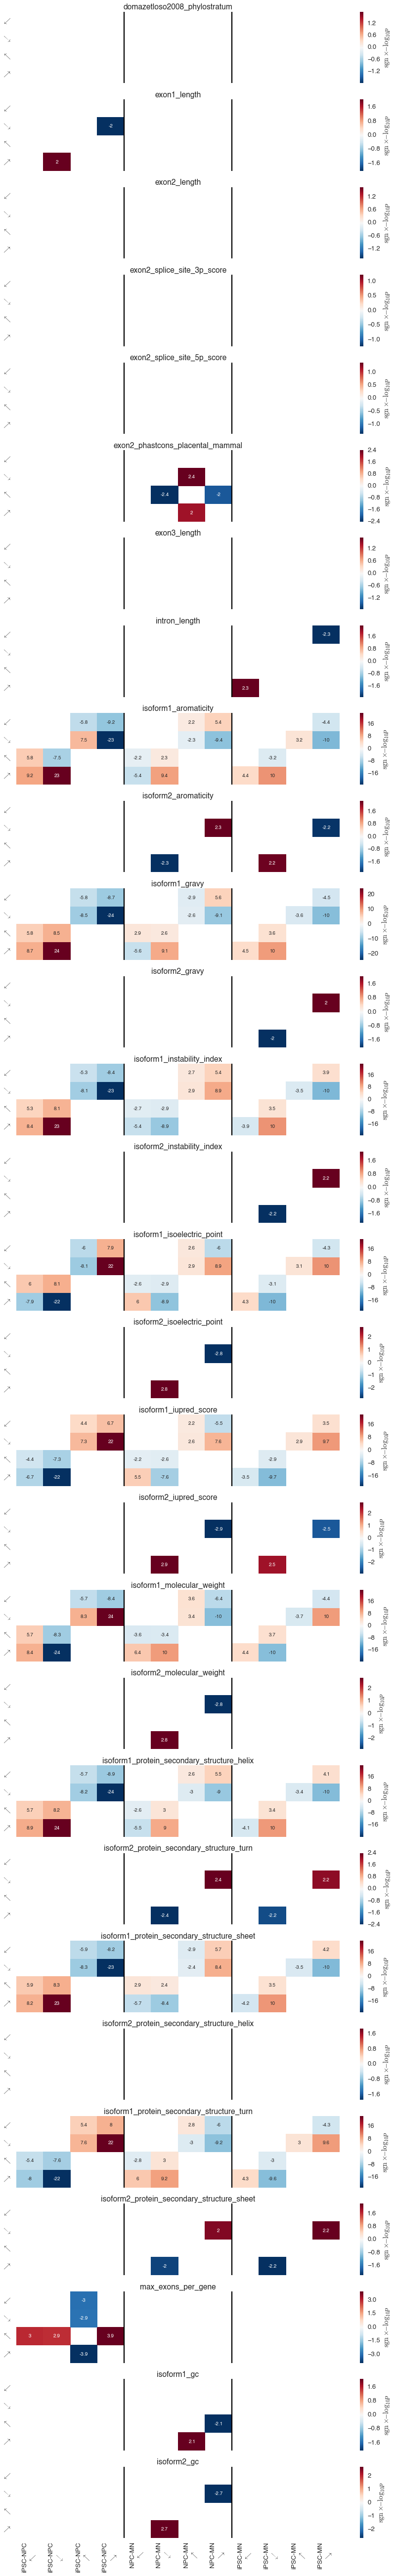

In [50]:
import itertools
import os
from scipy.stats import mannwhitneyu

from flotilla.visualize.generic import cdfplot

rnafold_cols = [x for x in study.splicing.feature_data if 'rnafold' in x]
numerical_cols = [#'log2(TPM+1)', 
#         'expression_var_log2_plus1', 
#         'expression_mean_log2_plus1',
        'domazetloso2008_phylostratum',
        'exon1_length',
        'exon2_length',
        'exon2_splice_site_3p_score',
        'exon2_splice_site_5p_score',
        'exon2_phastcons_placental_mammal',
        'exon3_length',
        'intron_length',
        'isoform1_aromaticity',
        'isoform2_aromaticity',
        'isoform1_gravy',
        'isoform2_gravy',
        'isoform1_instability_index',
        'isoform2_instability_index',
        'isoform1_isoelectric_point',
        'isoform2_isoelectric_point',
        'isoform1_iupred_score',
        'isoform2_iupred_score',
        'isoform1_molecular_weight',
        'isoform2_molecular_weight',
        'isoform1_protein_secondary_structure_helix',
        'isoform2_protein_secondary_structure_turn',        
        'isoform1_protein_secondary_structure_sheet',
        'isoform2_protein_secondary_structure_helix',
        'isoform1_protein_secondary_structure_turn',
        'isoform2_protein_secondary_structure_sheet',
        'max_exons_per_gene',
        'isoform1_gc',
 'isoform2_gc',
#  'isoform1_gc_position1',
#  'isoform2_gc_position1',
#  'isoform1_gc_position2',
#  'isoform2_gc_position2',
#  'isoform1_gc_position3',
#  'isoform2_gc_position3'
    ] + rnafold_cols
#  'skipped_exon_exon2_phastcons_placental_mammal',
#  'skipped_exon_exon2_splice_site_3p_score',
#  'skipped_exon_exon2_splice_site_5p_score'])

log10_cols = ['max_exons_per_gene', 'intron_length', 
             'isoform1_molecular_weight', 'isoform2_molecular_weight', 'expression_var', 
              'exon1_length', 'exon2_length', 'exon3_length']
cdf_cols = ['domazetloso2008_phylostratum', 'skipped_exon_exon2_splice_site_5p_score', 
            'skipped_exon_exon2_splice_site_3p_score', 'skipped_exon_exon2_phastcons_placental_mammal']
log10s = True, False

plots = 'cdf', 'box'

hue_order = [ r'$\nwarrow$', r'$\swarrow$',  r'$\nearrow$', r'$\searrow$']
palette = [MODALITY_TO_COLOR['~1'], MODALITY_TO_COLOR['middle'], MODALITY_TO_COLOR['bimodal'], MODALITY_TO_COLOR['~0']]

nrows = len(numerical_cols)
heatmap_fig, heatmap_axes = plt.subplots(figsize=(12, 2.5*nrows), nrows=nrows, sharex=True, sharey=True)
axes_iter = heatmap_axes.flat

for col in numerical_cols:
    for log10 in log10s:
        for plot in plots:
            suffix = '' if not log10 else '_log10'

            pdf = '{}/modalities_features_{}_{}{}.pdf'.format(folder, col, plot, suffix)
            if os.path.exists(pdf):
                continue
            if log10 and col not in log10_cols:
                continue
            if not log10 and col in log10_cols:
                continue
            if plot == 'cdf':
                if col not in cdf_cols:
                    continue
                g = sns.FacetGrid(voyages_annotated, col='transition', hue='direction', 
                                  hue_order=hue_order, palette=palette,
                                  size=3, legend_out=True)
                g.map(cdfplot, col, log=log10, alpha=0.75, linewidth=2)
                g.set(ylim=(0, 1))
                if col == 'domazetloso2008_phylostratum':
                    g.set(ylim=(0.8, 1))
                for ax in g.axes.flat:
                    if ax.is_first_col():
                        ax.locator_params('y', nbins=4)
                        ax.set_ylabel('Cumulative Distribution')
            else:
                log_col = col + '_log10' if log10 else col
                if log10:
                    voyages_annotated[log_col] = np.log10(voyages_annotated[col]).astype(float)
                
                # Which column to plot
                plot_col = log_col if log10 else col
                g = sns.factorplot(y=log_col, x='transition', hue='direction', data=voyages_annotated, 
                                   kind=plot, aspect=2, notch=True, hue_order=hue_order, palette=palette, legend=False)
            g.add_legend(ncol=2, label_order=hue_order)

            g.savefig(pdf)
    annotated_grouped = voyages_annotated.groupby(['transition', 'direction'])
#     expression_grouped = modalities_expression.groupby(['phenotype', 'modality'])

    columns = pd.MultiIndex.from_product([transition_strs, hue_order])
    p_values = pd.DataFrame(index=hue_order, columns=columns, dtype=float)
    signs = pd.DataFrame(index=hue_order, columns=columns, dtype=float)

    for transition in transition_strs:
        for direction1, direction2 in itertools.combinations(hue_order, 2):
            try:
                values1 = annotated_grouped[col].get_group((transition, direction1))
                values2 = annotated_grouped[col].get_group((transition, direction2))
            except KeyError:
                values1 = expression_grouped[col].get_group((transition, direction1))
                values2 = expression_grouped[col].get_group((transition, direction2))
                
            statistic, p_value = mannwhitneyu(values1, values2, use_continuity=True)
            
            # Get two-sided p-value
            p_value *= 2
            sign = np.sign(values2.mean() - values1.mean())
            p_values.loc[direction1, (transition, direction2)] = p_value
            p_values.loc[direction2, (transition, direction1)] = p_value
            signs.loc[direction1, (transition, direction2)] = sign
            signs.loc[direction2, (transition, direction1)] = -sign

    heatmap_ax = axes_iter.next()
    plt.sca(heatmap_ax)
    xticklabels = map(lambda x: '\n'.join(x), p_values.columns.values)

    # inds = np.tril_indices_from(p_values, 1)
    # p_values.values[inds] = 1
    p_values_log10 = -np.log10(p_values)
    vmax = p_values_log10[np.isfinite(p_values_log10)].max().max()
    # p_values_log10
    mask = (p_values > 0.01) | p_values.isnull()

    p_values_log10 = p_values_log10 * signs

    sns.heatmap(p_values_log10, xticklabels=xticklabels, annot=True, mask=mask, vmax=vmax, vmin=-vmax, 
                cbar_kws=dict(label=r'$ \mathrm{sgn} \times -\log_{10}p$'), ax=heatmap_ax)
    ymin, ymax = heatmap_ax.get_ylim()
    heatmap_ax.vlines((len(hue_order), 2*len(hue_order)), ymin, ymax)
    heatmap_ax.set(title=col, xlabel='');
heatmap_fig.tight_layout()
heatmap_fig.savefig('{}/modalities_features_numeric_enrichment.pdf'.format(folder))

### Count-based features

In [64]:
range(3)

[0, 1, 2]

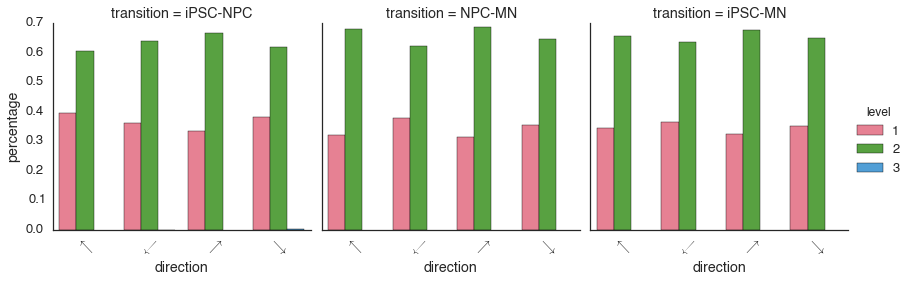

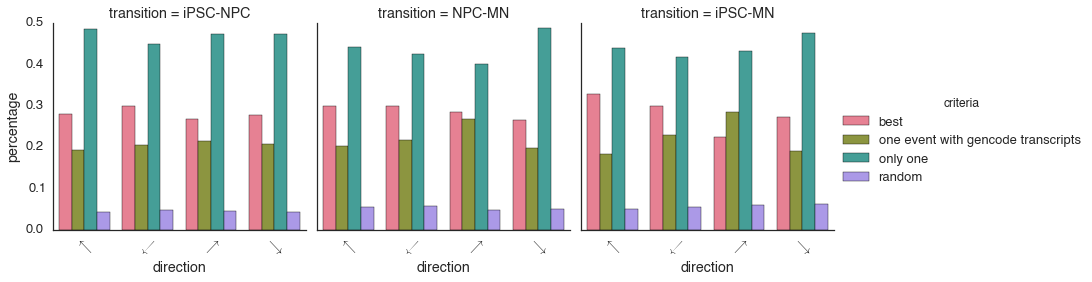

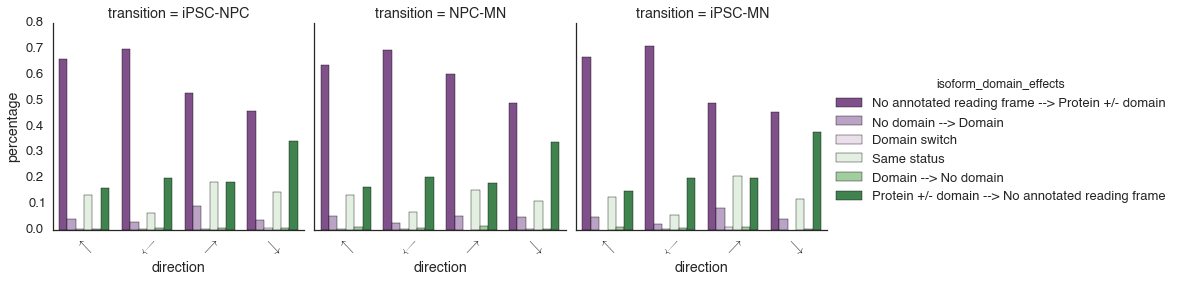

In [71]:
count_cols = ['level', 'criteria', u'isoform_domain_effects']

order = [ r'$\nwarrow$', r'$\swarrow$',  r'$\nearrow$', r'$\searrow$']
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

for col in count_cols:
    s = voyages_annotated.groupby(['transition', 'direction', col]).size()
    df = s.reset_index()
    df = df.rename(columns={0: 'count'})
    df['percentage'] = df.groupby(['transition', 'direction'])['count'].apply(lambda x: x/x.sum())
#     g = sns.FacetGrid(df, col='phenotype', hue='modality', hue_order=hue_order, palette=palette,
#                       col_order=study.phenotype_order)
#     g.map(barh, 'percentage', col)
    if col == 'isoform_domain_effects':
        hue_order = isoform_domain_effects_order
        palette = 'PRGn'
    else:
        hue_order = None
        palette = 'husl'

    g = sns.factorplot(hue=col, col='transition', x='direction', y='percentage', kind='bar',  data=df,
#                        hue_order=hue_order, palette=palette, 
                       hue_order=hue_order,
                       palette=palette,
                       order=order,
                       col_order=transition_strs)
    g.savefig('{}/transition_features_{}_barplot.pdf'.format(folder, col))

## Gene Ontology enrichment

In [ ]:
# %%time

# def filter_and_save(original_bed, names, filename):
#     filtered_bed = original_bed.filter(lambda x: x.name in names)
#     return filtered_bed.saveas(filename)

transition_grouped = study.supplemental.voyages.groupby(['transition'])

study.splicing.feature_expression_id_col = 'ensembl_id'

go_dfs = []

for (transition, direction), df in voyages_filtered.groupby(['transition', 'direction']):
    
    foreground_events = set(df.event_id)
    background_df = transition_grouped.get_group(transition)
    background_events = set(background_df.event_id) - foreground_events
    
    foreground_genes = study.splicing.splicing_to_expression_id(foreground_events)
    background_genes = study.splicing.splicing_to_expression_id(background_events)
    go = study.go_enrichment(foreground_genes, background_genes, domain=['biological_process', 'molecular_function'],
                             min_feature_size=5, min_background_size=10)
    fig, ax = plt.subplots()
    plot_go_enrichment(data=go)
    ax.set(title='{} {}'.format(transition, direction))
    fig.savefig('{}/go_enrichment_{}_{}.pdf'.format(folder, transition, direction.strip('\$')))
    go = go.reset_index()
    go['transition'] = transition
    go['direction'] = direction
    go_dfs.append(go)
go_df = pd.concat(go_dfs)

In [27]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

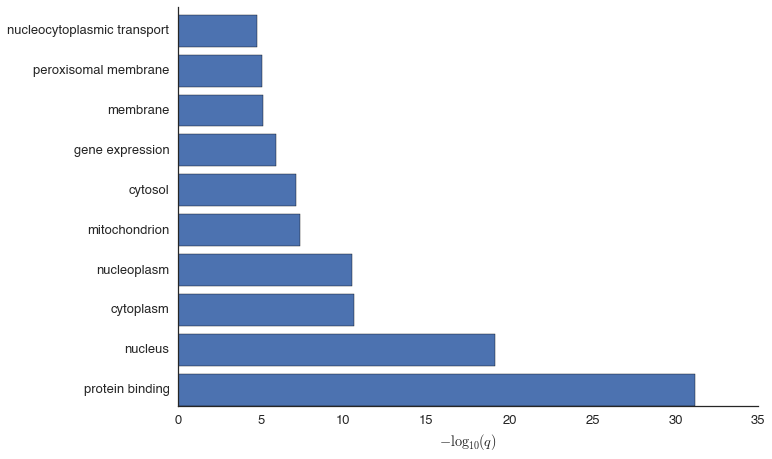

In [32]:
%pdb

Automatic pdb calling has been turned ON


In [35]:
plot_go_enrichment?

In [34]:
g = sns.FacetGrid(go_df, col='direction', row='transition')
g.map_dataframe(plot_go_enrichment)

KeyError: 9

> /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/homer/pandas/hashtable.pyx(381)pandas.hashtable.Int64HashTable.get_item (pandas/hashtable.c:7162)()

ipdb> dir()
['Factorizer', 'Float64HashTable', 'Float64Vector', 'HashTable', 'Int32HashTable', 'Int64Factorizer', 'Int64HashTable', 'Int64Vector', 'ONAN', 'ObjectVector', 'PyObjectHashTable', 'StringHashTable', '_SIZE_HINT_LIMIT', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__test__', 'duplicated_int64', 'list_to_object_array', 'mode_int64', 'mode_object', 'na_sentinel', 'np', 'unique_label_indices', 'value_count_int64', 'value_count_object']
ipdb> u
> /home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/core/index.py(1598)get_value()
   1597             if len(self) > 0 and self.inferred_type in ['integer','boolean']:
-> 1598                 raise
   1599 

ipdb> u
> /home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/core/series.py(550)__getitem__()
    549                     retu

KeyError: 9

> /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/homer/pandas/hashtable.pyx(381)pandas.hashtable.Int64HashTable.get_item (pandas/hashtable.c:7162)()

ipdb> q


In [26]:
go_df.head()

,index,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value,transition,direction
0,GO:0000398,"ENSG00000115875,ENSG00000197111,ENSG0000012594...","SRSF7,PCBP2,HNRNPR,HNRNPD,SYNCRIP,SNRPG,HNRNPA...",biological_process,"mRNA splicing, via spliceosome",52,8,196,1.158368e-09,2.316736e-08,NPC-MN,$\nearrow$
1,GO:0008380,"ENSG00000115875,ENSG00000197111,ENSG0000012594...","SRSF7,PCBP2,HNRNPR,HNRNPD,SYNCRIP,SNRPG,HNRNPA...",biological_process,RNA splicing,71,8,268,2.069850e-08,4.139699e-07,NPC-MN,$\nearrow$
2,GO:0005654,"ENSG00000141552,ENSG00000115875,ENSG0000019711...","ANAPC11,SRSF7,PCBP2,HNRNPR,RBPJ,HNRNPD,SYNCRIP...",cellular_component,nucleoplasm,141,10,1060,6.815650e-08,1.363130e-06,NPC-MN,$\nearrow$
3,GO:0071013,"ENSG00000125944,ENSG00000143977,ENSG0000012256...","HNRNPR,SNRPG,HNRNPA2B1,HNRNPC,SYNCRIP",cellular_component,catalytic step 2 spliceosome,27,5,88,2.115636e-07,4.231271e-06,NPC-MN,$\nearrow$
4,GO:0030529,"ENSG00000197111,ENSG00000125944,ENSG0000013866...","PCBP2,HNRNPR,HNRNPD,SYNCRIP,HNRNPA2B1,HNRNPC",cellular_component,ribonucleoprotein complex,45,6,160,2.411086e-07,4.822172e-06,NPC-MN,$\nearrow$


In [17]:
homer_dir = '{}/homer'.format(bed_folder)
!mkdir -p $homer_dir

### Get upstream/downstream sequences

In [18]:
import os
import glob
import pybedtools

nt = 200

directions = 'upstream', 'downstream'

for bedfile in glob.iglob('{}/exon2*.bed'.format(bed_folder)):
    if 'stream' in bedfile:
        continue
    
    basename = os.path.basename(bedfile)
    print basename
    prefix = basename.split('.bed')[0]
    bed = pybedtools.BedTool(bedfile)
    
    for direction in directions:
        # Get downstream intron
        if direction == 'downstream':
            intron = bed.flank(l=0, r=nt, s=True, g=pybedtools.chromsizes('hg19'))
        elif direction == 'upstream':
            intron = bed.flank(l=nt, r=0, s=True, g=pybedtools.chromsizes('hg19'))
            
    # Saved every exon that was exactly upstream or downstream of a junction,
    # So when taking the flanking sequence, there's a lot of repetition
    unique = pybedtools.BedTool(list(set(x for x in intron)))
    
    
    print '\t', len(intron), len(unique)
    saveas = '{}/{}_{}{}.bed'.format(bed_folder, prefix, direction, nt)
    print '\t', saveas
    unique.saveas(saveas)
    ! wc -l $saveas

exon2_iPSC-NPC_swarrow.bed
	371 371
	/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_swarrow_downstream200.bed
371 /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_swarrow_downstream200.bed
exon2_iPSC-MN_nearrow_background.bed
	2331 2331
	/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-MN_nearrow_background_downstream200.bed
2331 /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-MN_nearrow_background_downstream200.bed
exon2_iPSC-NPC_nearrow.bed
	93 93
	/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_nearrow_downstream200.bed
93 /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_nearrow_downstream200.bed
exon2_iPSC-MN_searrow_background.bed
	2265 2265
	/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-MN_searrow_background_downstream200.bed
2265 /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_

In [22]:
cd $homer_dir

/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/homer


In [23]:

import os
import fileinput

from gscripts.qtools import Submitter
import glob
import itertools

findMotifsGenome = '/home/yeo-lab/software/homer/bin/findMotifsGenome.pl'
n_processors = 4
homer_flags = '-rna -len 4,5,6,7 -mset vertebrates -mis 1 -p {}'.format(n_processors)

commands = []


for bedfile in glob.iglob('{}/exon2*.bed'.format(bed_folder)):
    
    basename = os.path.basename(bedfile)
    if 'background' in basename:
        continue
    
    prefix = basename.split('.')[0]
    transition = prefix.split('_')[1]
    direction = prefix.split('_')[2]
#     print modality
    
    background = bedfile.replace(direction, direction + '_background')
    
    out_dir = '{}/{}'.format(homer_dir, basename.replace('.bed', ''))
    if os.path.exists('{}/homerResults.html'):
        print 'Already finished {}, moving on'.format(basename)
        continue
    command = '{} {} hg19 {} -bg {} {}'.format(
        findMotifsGenome, bedfile, out_dir, background, homer_flags)
    print '\n', command
    commands.append(command)
#     ! $command
jobname = 'homer'
sub = Submitter(commands, jobname, walltime='1:00:00', queue='home-scrm',
               ppn=n_processors, write_and_submit=True, array=True,
               out_filename='{}/{}.out'.format(homer_dir, jobname),
               err_filename='{}/{}.err'.format(homer_dir, jobname),)

running 24 tasks as an array-job.
job ID: 3670513



/home/yeo-lab/software/homer/bin/findMotifsGenome.pl /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_swarrow.bed hg19 /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/homer/exon2_iPSC-NPC_swarrow -bg /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_swarrow_background.bed -rna -len 4,5,6,7 -mset vertebrates -mis 1 -p 4

/home/yeo-lab/software/homer/bin/findMotifsGenome.pl /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_swarrow_downstream200.bed hg19 /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/homer/exon2_iPSC-NPC_swarrow_downstream200 -bg /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_swarrow_background_downstream200.bed -rna -len 4,5,6,7 -mset vertebrates -mis 1 -p 4

/home/yeo-lab/software/homer/bin/findMotifsGenome.pl /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voayges/exon2_iPSC-NPC_nearrow.bed hg19 /projects/ps-yeolab/o

In [20]:
prefix

'exon2_iPSC-NPC_nwarrow_downstream200'